[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset Shape: (50000, 2)
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8448\4219745636.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=df, palette="Set2")


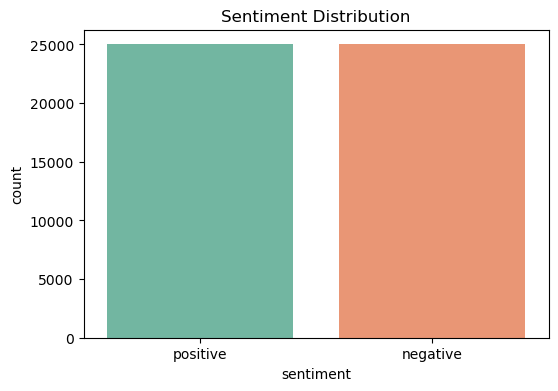

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8448\4219745636.py:38: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()



Accuracy: 0.892

Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



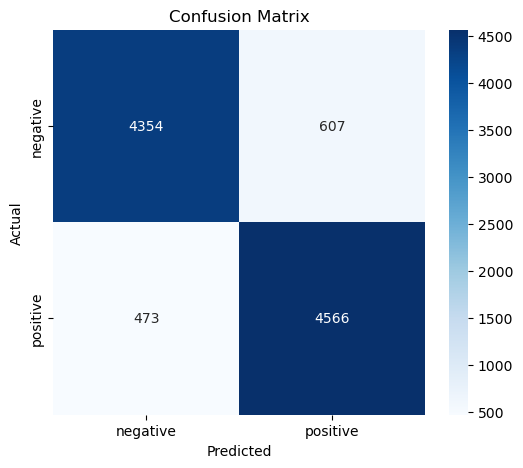

<Figure size 800x500 with 0 Axes>

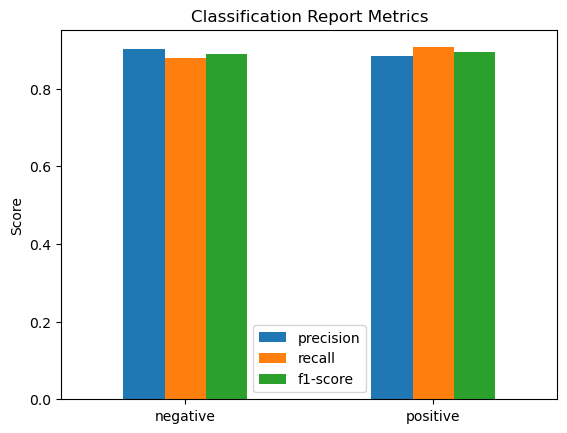


Custom Review Prediction: positive


In [5]:
# 1. Download the IMDB dataset using kagglehub
import kagglehub
import pandas as pd
import os
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Download stopwords for text cleaning
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Download dataset
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

# Load dataset
file_path = os.path.join(path, "IMDB Dataset.csv")
df = pd.read_csv(file_path)

print("Dataset Shape:", df.shape)
print(df['sentiment'].value_counts())

# Plot sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x="sentiment", data=df, palette="Set2")
plt.title("Sentiment Distribution")
plt.show()

# 2. Preprocess text
def clean_review(text):
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub("[^a-zA-Z]", " ", text)
    words = text.lower().split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

df['cleaned_review'] = df['review'].apply(clean_review)

# 3. Split dataset
X = df['cleaned_review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Convert text into numbers (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 5. Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

# 6. Predictions & Evaluation
y_pred = model.predict(X_test_tfidf)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('confusion_matrix.png')
plt.show()

# Plot classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8,5))
report_df[['precision','recall','f1-score']].iloc[:-3].plot(kind='bar')
plt.title("Classification Report Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.savefig('classification_report.png')
plt.show()

# 7. Test with a custom review
test_review = ["This movie was absolutely fantastic, I loved it!"]
test_review_cleaned = [clean_review(test_review[0])]
test_vector = vectorizer.transform(test_review_cleaned)
print("\nCustom Review Prediction:", model.predict(test_vector)[0])
